In [1]:
import numpy as np
import pandas as pd

In [2]:
file_path = 'asdf_single_log.csv'

x_names = ['L%d%c' % (i, c) for i in range(21) for c in ['x', 'y', 'z']] 
y_names = ['a', 's', 'd', 'f', 'None']

col_names = x_names + y_names

df = pd.read_csv(file_path, names=col_names)
df.head()

,L0x,L0y,L0z,L1x,L1y,L1z,L2x,L2y,L2z,L3x,...,L19y,L19z,L20x,L20y,L20z,a,s,d,f,None
0,0.784137,0.571423,-0.000070,0.717472,0.588176,-0.019694,0.677530,0.638703,-0.053698,0.655191,...,0.840377,-0.125986,0.778810,0.874677,-0.121082,0,0,0,0,NaN
1,0.788276,0.570284,-0.000059,0.716185,0.588995,-0.011217,0.675919,0.639470,-0.042548,0.655003,...,0.844294,-0.125256,0.780763,0.876653,-0.116899,0,0,0,0,NaN
2,0.786306,0.569776,-0.000071,0.715083,0.587393,-0.018008,0.674956,0.636717,-0.051495,0.653109,...,0.841617,-0.119656,0.779967,0.873632,-0.110956,0,0,0,0,NaN
3,0.785780,0.570257,-0.000058,0.715375,0.589984,-0.015940,0.675341,0.638634,-0.047662,0.654607,...,0.838399,-0.119746,0.787253,0.870319,-0.111778,0,0,0,0,NaN
4,0.785705,0.572603,-0.000063,0.715555,0.591844,-0.016335,0.675516,0.641593,-0.049657,0.653885,...,0.837749,-0.123455,0.791014,0.870493,-0.115880,0,0,0,0,NaN


In [ ]:
y_names_origin = ['a', 's', 'd', 'f']

for row in range(len(df)):
    if 1 in df[y_names_origin].iloc[row]:
        df['None'].iloc[row] = 0
    else:
        df['None'].iloc[row] = 1


In [7]:
import sys, os
sys.path.append(os.pardir)

from visualization.smoother import gamma_smoothing, average_smoothing

In [8]:
# df = gamma_smoothing(df)  # takes about 1 min
df = average_smoothing(df)
df.head()

C:\Users\honey\anaconda3\envs\sib\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
# normalization, about 1 min

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

for column in x_names:
	df_column = df[column]
	df_column = df_column.values.reshape(-1, 1)
	df_column = scaler.fit_transform(df_column)

	for row in range(len(df)):
		df[column].iloc[row] = df_column[row]


In [12]:
# x, y split
x, y = df[x_names], df[y_names]

In [13]:
# train, test split
train_test_ratio = 0.8

train_num = int(len(df) * 0.8)

x_train, x_test = x[:train_num], x[train_num:]
y_train, y_test = y[:train_num], y[train_num:]

In [14]:
# apply mlp

import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(63,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])



In [15]:
model.fit(x_train, y_train, epochs=500)

model.evaluate(x_test, y_test, verbose=2)

========] - 0s 2ms/step - loss: 0.6519 - accuracy: 0.2934
Epoch 304/500
34/34 [==============================] - 0s 2ms/step - loss: 0.6330 - accuracy: 0.2683
Epoch 305/500
34/34 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.2535
Epoch 306/500
34/34 [==============================] - 0s 2ms/step - loss: 0.6868 - accuracy: 0.2711
Epoch 307/500
34/34 [==============================] - 0s 2ms/step - loss: 0.5766 - accuracy: 0.2971
Epoch 308/500
34/34 [==============================] - 0s 2ms/step - loss: 0.6520 - accuracy: 0.2656
Epoch 309/500
34/34 [==============================] - 0s 2ms/step - loss: 0.6410 - accuracy: 0.2637
Epoch 310/500
34/34 [==============================] - 0s 2ms/step - loss: 0.6353 - accuracy: 0.2526
Epoch 311/500
34/34 [==============================] - 0s 2ms/step - loss: 0.6246 - accuracy: 0.2507
Epoch 312/500
34/34 [==============================] - 0s 2ms/step - loss: 0.5931 - accuracy: 0.2201
Epoch 313/500
34/34 [============

[0.6526731848716736, 0.6185185313224792]

In [19]:
x_test.iloc[0]

L0x     0.488443
L0y     0.234610
L0z     0.368000
L1x     0.454094
L1y     0.263257
          ...   
L19y    0.408987
L19z    0.516419
L20x    0.606077
L20y    0.505321
L20z    0.488946
Name: 1077, Length: 63, dtype: float64

In [28]:
x_test.iloc[0].values.reshape(-1, 1)

array([[0.48844274],
       [0.23460972],
       [0.368     ],
       [0.4540944 ],
       [0.26325721],
       [0.52015929],
       [0.29661776],
       [0.32502925],
       [0.61548335],
       [0.17953916],
       [0.33075915],
       [0.62524084],
       [0.11000952],
       [0.2906089 ],
       [0.62002785],
       [0.43393499],
       [0.68365232],
       [0.76537494],
       [0.59371678],
       [0.78193058],
       [0.67077471],
       [0.64230815],
       [0.7867592 ],
       [0.63375066],
       [0.72650759],
       [0.81640341],
       [0.50449555],
       [0.43291423],
       [0.63549437],
       [0.76580166],
       [0.6003371 ],
       [0.70156261],
       [0.69781361],
       [0.70255065],
       [0.68267228],
       [0.52498903],
       [0.75882432],
       [0.70026059],
       [0.38423728],
       [0.44279871],
       [0.50877485],
       [0.67640276],
       [0.65737452],
       [0.54191348],
       [0.62415919],
       [0.75347513],
       [0.67513302],
       [0.560

In [31]:
k = model.predict(x_test)
l = y_test - l

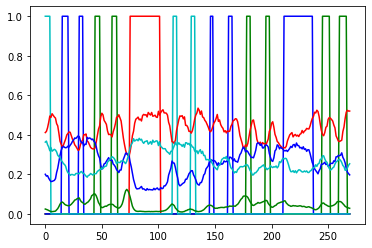

In [43]:
import matplotlib.pyplot as plt
plt.plot(range(270), y_test['a'], 'r')
plt.plot(range(270), y_test['s'], 'g')
plt.plot(range(270), y_test['d'], 'b')
plt.plot(range(270), y_test['f'], 'c')

plt.plot(range(270), k[:,0], 'r')
plt.plot(range(270), k[:,1], 'g')
plt.plot(range(270), k[:,2], 'b')
plt.plot(range(270), k[:,3], 'c')
